## 读取图片

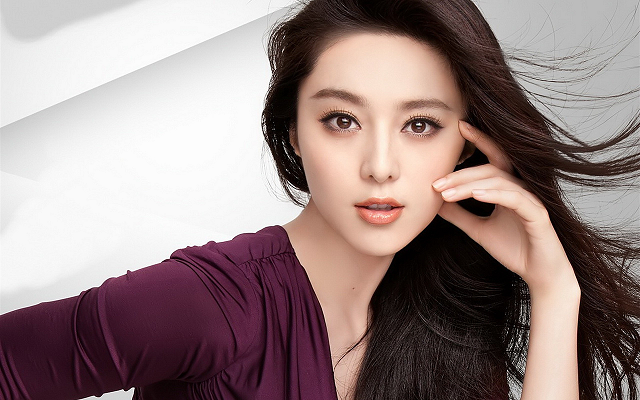

In [4]:
import numpy as np
from PIL import Image
img = Image.open('Data/iceice.png')
img

## 转为数学矩阵

In [6]:
import numpy
imgary = numpy.array(img)
imgary = imgary/255
imgary.shape

(400, 640, 4)

In [7]:
## 计算储存图片所需空间

In [8]:
original_bytes = imgary.nbytes
original_bytes

8192000

In [9]:
imgary.shape

(400, 640, 4)

## 拆分为红蓝绿三色矩阵

In [13]:
img_red = imgary[:,:,0]
img_green = imgary[:,:,1]
img_blue = imgary[:,:,2]

In [14]:
img_red.shape
img_green.shape
img_blue.shape

(400, 640)

## 使用SVD分解矩阵

In [16]:
from numpy.linalg import svd
U_r,S_r,V_r = svd(img_red,full_matrices= True)
U_g,S_g,V_g = svd(img_green,full_matrices= True)
U_b,S_b,V_b = svd(img_blue,full_matrices= True)

In [17]:
S_r.shape

(400,)

## 取用50个特征值

In [40]:
K = 100

In [50]:
U_r_k = U_r[:,0:k]
V_r_k = V_r[0:K,:]
U_g_k = U_g[:,0:k]
V_g_k = V_g[0:K,:]
U_b_k = U_b[:,0:k]
V_b_k = V_b[0:K,:]

S_r_k = S_r[0:k]
S_g_k = S_g[0:k]
S_b_k = S_b[0:k]

In [51]:
U_r_k.shape
S_r_k.shape
V_r_k.shape

(100, 640)

## 计算压缩比

In [52]:
compressed_bytes = sum([materix.nbytes for materix in [U_r_k,S_r_k,V_r_k,U_g_k,S_g_k,V_g_k,U_b_k,S_b_k,V_r_k]])
ratio = compressed_bytes / original_bytes
ratio

0.246240234375

## 还原矩阵

In [53]:
image_red_approx = np.dot(U_r_k,np.dot(numpy.diag(S_r_k),V_r_k))
image_green_approx = np.dot(U_g_k,np.dot(numpy.diag(S_g_k),V_g_k))
image_blue_approx = np.dot(U_b_k,np.dot(numpy.diag(S_b_k),V_b_k))

ValueError: shapes (50,50) and (100,640) not aligned: 50 (dim 1) != 100 (dim 0)

In [45]:
image_red_approx.shape

(400, 640)

In [34]:
row,col, _ =imgary.shape
img_reconstructed = np.zeros((row,col,3))

img_reconstructed[:,:,0] = image_red_approx
img_reconstructed[:,:,1] = image_green_approx
img_reconstructed[:,:,2] = image_blue_approx

In [35]:
img_reconstructed.shape

(400, 640, 3)

## 正规化异常值

In [36]:
img_reconstructed[img_reconstructed < 0] = 0
img_reconstructed[img_reconstructed > 1] = 1
img_reconstructed.shape

(400, 640, 3)

## 绘制还原图片

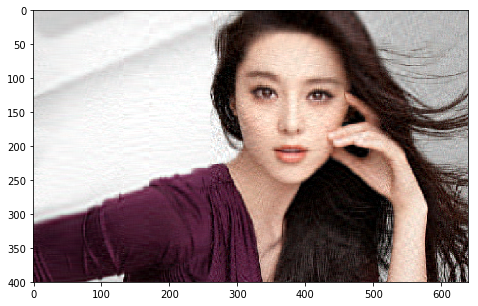

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
a = fig.add_subplot(1,1,1)
imgplot = plt.imshow(img_reconstructed)